# Group Members 
AAMIR ALI (DS-016) | MUHAMMAD ZEESHAN (DS-027) | MUHAMMAD TALAL HUSSAIN (CCEE)

# TTDS: Machine Learning project 

In [129]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
from matplotlib import pyplot 
import matplotlib.pyplot as plt

In [130]:
data=pd.read_csv("D:/DataSets/diabetes.csv")

In [131]:
data

,preg,glucose,bp_diastolic,skin_triceps,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Dataset Extension

In [132]:
# Generate synthetic data by doubling the 'label' values
data_synthetic = data.copy()

# Concatenate the original and synthetic DataFrames
df = pd.concat([data, data_synthetic], ignore_index=True)

# Display the extended DataFrame
df

,preg,glucose,bp_diastolic,skin_triceps,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
1531,10,101,76,48,180,32.9,0.171,63,0
1532,2,122,70,27,0,36.8,0.340,27,0
1533,5,121,72,23,112,26.2,0.245,30,0
1534,1,126,60,0,0,30.1,0.349,47,1


In [133]:
df.head(10)

,preg,glucose,bp_diastolic,skin_triceps,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [134]:
df.tail()

,preg,glucose,bp_diastolic,skin_triceps,insulin,bmi,pedigree,age,label
1531,10,101,76,48,180,32.9,0.171,63,0
1532,2,122,70,27,0,36.8,0.340,27,0
1533,5,121,72,23,112,26.2,0.245,30,0
1534,1,126,60,0,0,30.1,0.349,47,1
1535,1,93,70,31,0,30.4,0.315,23,0


In [135]:
df.columns

Index(['preg', 'glucose', 'bp_diastolic', 'skin_triceps', 'insulin', 'bmi',
       'pedigree', 'age', 'label'],
      dtype='object')

In [136]:
print("Number of Row in the Dataset:", df.shape[0])
print("Number of Columns in the Dataset:", df.shape[1])

Number of Row in the Dataset: 1536
Number of Columns in the Dataset: 9


# Missing Values:

In [137]:
df.isnull().sum()

preg            0
glucose         0
bp_diastolic    0
skin_triceps    0
insulin         0
bmi             0
pedigree        0
age             0
label           0
dtype: int64

In [138]:
#check missing Values in the Dataset
missing_data=df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

preg
False    1536
Name: preg, dtype: int64

glucose
False    1536
Name: glucose, dtype: int64

bp_diastolic
False    1536
Name: bp_diastolic, dtype: int64

skin_triceps
False    1536
Name: skin_triceps, dtype: int64

insulin
False    1536
Name: insulin, dtype: int64

bmi
False    1536
Name: bmi, dtype: int64

pedigree
False    1536
Name: pedigree, dtype: int64

age
False    1536
Name: age, dtype: int64

label
False    1536
Name: label, dtype: int64



No missing values found in the dataset, therefore data doesn't need to be drop or replace. 

# Outliers Analysis

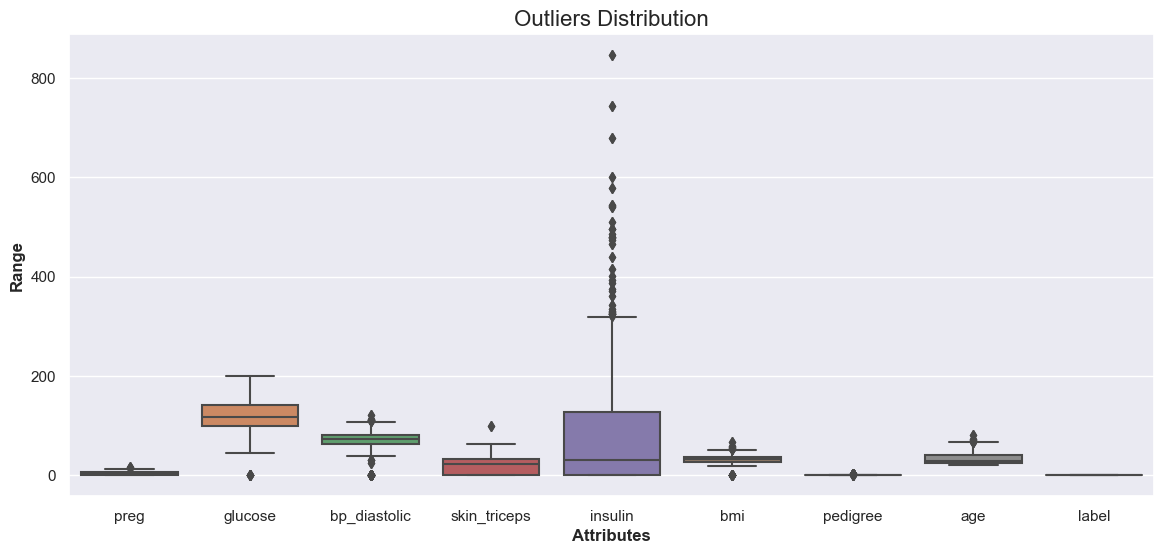

In [139]:
def show_boxplot(df):
    plt.rcParams['figure.figsize'] = [14,6]
    sns.boxplot(data = df, orient="v")
    plt.title("Outliers Distribution", fontsize = 16)
    plt.ylabel("Range", fontweight = 'bold')
    plt.xlabel("Attributes", fontweight = 'bold')
show_boxplot(df)

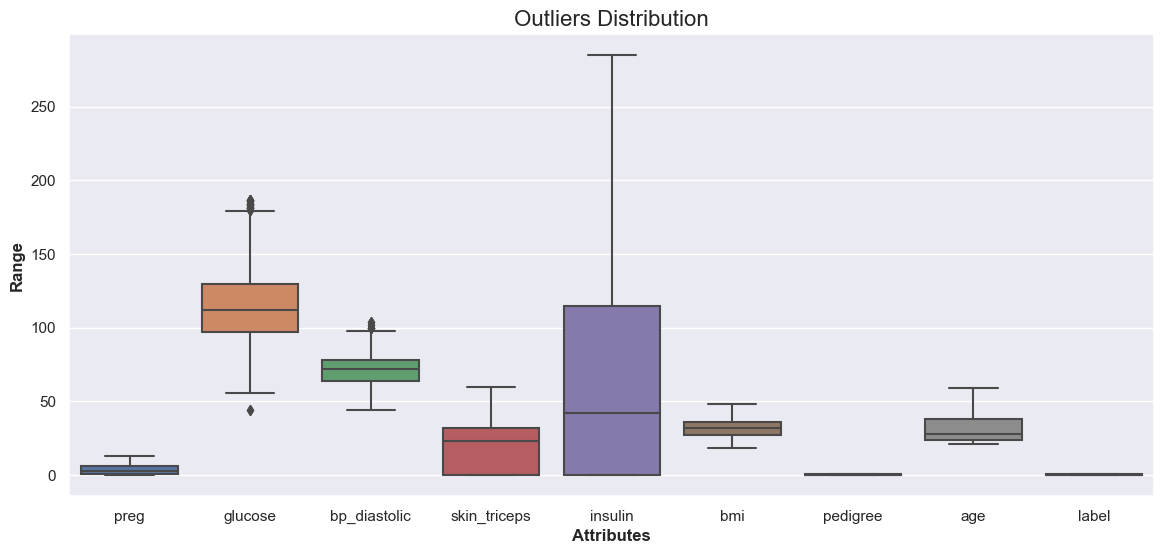

In [144]:
#Function 1st time
def remove_outliers(data):
   
    df = data.copy()

    for col in list(df.columns):
        Q1 = df[str(col)].quantile(0.25)
        Q3 = df[str(col)].quantile(0.75)
        IQR = Q3 - Q1
        # Define the lower and upper bounds to filter outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df = df[(df[str(col)] >= lower_bound) & (df[str(col)] <= upper_bound)]

    return df
without_outliers = remove_outliers(df)
show_boxplot(without_outliers)

NOTE: Outliers completely removed, after function has been run two to three times. 

In [145]:
df=without_outliers

In [146]:
# Data Formating

In [147]:
df.dtypes

preg              int64
glucose           int64
bp_diastolic      int64
skin_triceps      int64
insulin           int64
bmi             float64
pedigree        float64
age               int64
label             int64
dtype: object

# Exploratory Data Analysis (EDA)

# Descriptive Satistics:

In [148]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
preg,1154.0,3.714038,3.220655,0.000,1.000,3.000,6.00,13.000
glucose,1154.0,115.873484,26.601090,44.000,97.000,112.000,130.00,187.000
bp_diastolic,1154.0,71.512998,10.927511,44.000,64.000,72.000,78.00,104.000
skin_triceps,1154.0,20.554593,15.202166,0.000,0.000,23.000,32.00,60.000
insulin,1154.0,63.875217,74.846904,0.000,0.000,42.000,115.00,285.000
bmi,1154.0,31.771577,6.290296,18.200,27.200,31.900,35.80,48.300
pedigree,1154.0,0.412315,0.226911,0.078,0.238,0.349,0.56,1.034
age,1154.0,31.386482,9.661649,21.000,24.000,28.000,38.00,59.000
label,1154.0,0.287695,0.452884,0.000,0.000,0.000,1.00,1.000


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1154 entries, 0 to 1535
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   preg          1154 non-null   int64  
 1   glucose       1154 non-null   int64  
 2   bp_diastolic  1154 non-null   int64  
 3   skin_triceps  1154 non-null   int64  
 4   insulin       1154 non-null   int64  
 5   bmi           1154 non-null   float64
 6   pedigree      1154 non-null   float64
 7   age           1154 non-null   int64  
 8   label         1154 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 90.2 KB


In [150]:
df.corr()

,preg,glucose,bp_diastolic,skin_triceps,insulin,bmi,pedigree,age,label
preg,1.000000,0.138795,0.189098,-0.100705,-0.122938,0.032606,0.020097,0.631633,0.243163
glucose,0.138795,1.000000,0.226439,0.006170,0.245943,0.182561,0.053757,0.228683,0.471691
bp_diastolic,0.189098,0.226439,1.000000,0.021498,-0.047203,0.273685,0.008331,0.347694,0.155218
skin_triceps,-0.100705,0.006170,0.021498,1.000000,0.490409,0.370966,0.153382,-0.120126,0.028706
insulin,-0.122938,0.245943,-0.047203,0.490409,1.000000,0.184621,0.240362,-0.089042,0.093990
bmi,0.032606,0.182561,0.273685,0.370966,0.184621,1.000000,0.127087,0.100759,0.260131
pedigree,0.020097,0.053757,0.008331,0.153382,0.240362,0.127087,1.000000,0.025637,0.169632
age,0.631633,0.228683,0.347694,-0.120126,-0.089042,0.100759,0.025637,1.000000,0.304393
label,0.243163,0.471691,0.155218,0.028706,0.093990,0.260131,0.169632,0.304393,1.000000


In [151]:
#Total size of the Rows of dataset:
print("Total Rows of the dataset:", df.shape[0])

#Total size of the Columns of dataset:
print("Total Columns of the dataset:", df.shape[1])

Total Rows of the dataset: 1154
Total Columns of the dataset: 9


In [152]:
#check label value count 
df.label.value_counts()

0    822
1    332
Name: label, dtype: int64

# Graphical Analysis

# Boxplot

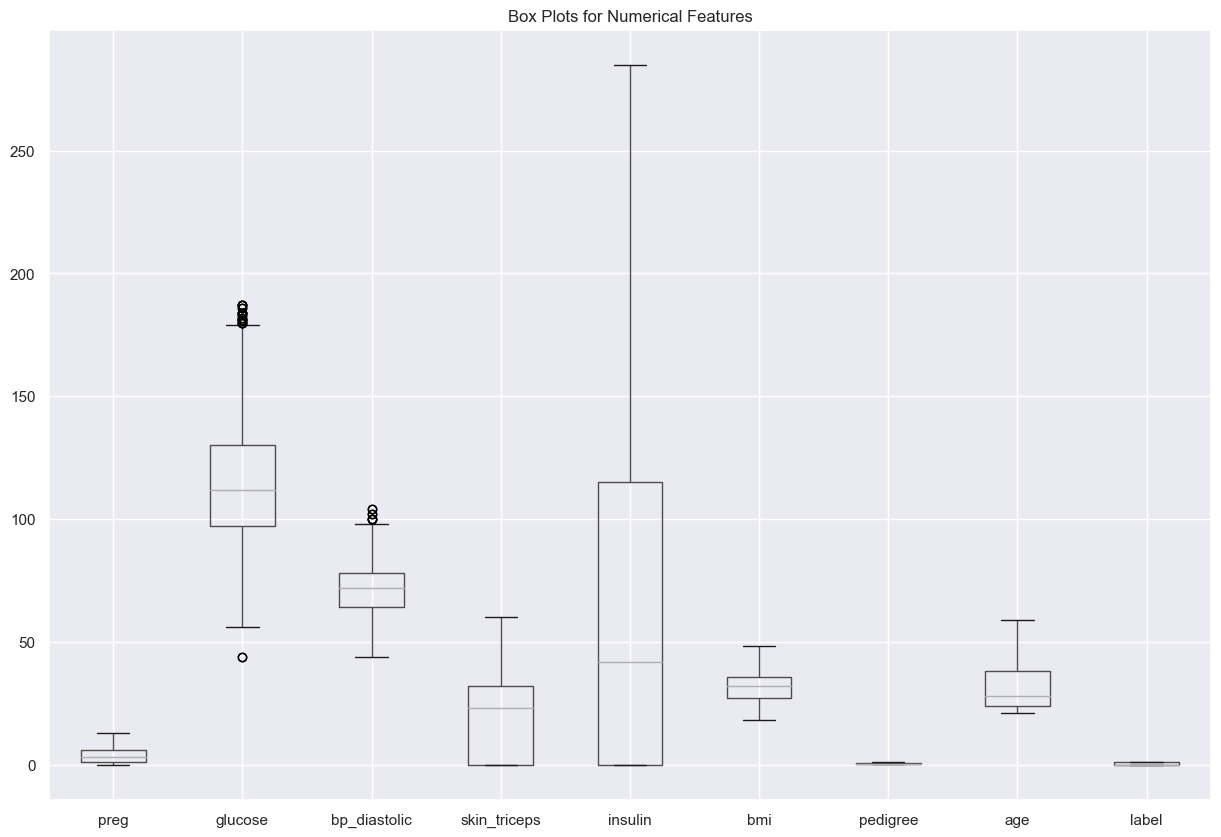

In [153]:
# Box plots for numerical features
plt.figure(figsize=(15, 10))
df.boxplot()
plt.title('Box Plots for Numerical Features')
plt.show()

# Featues Distribution

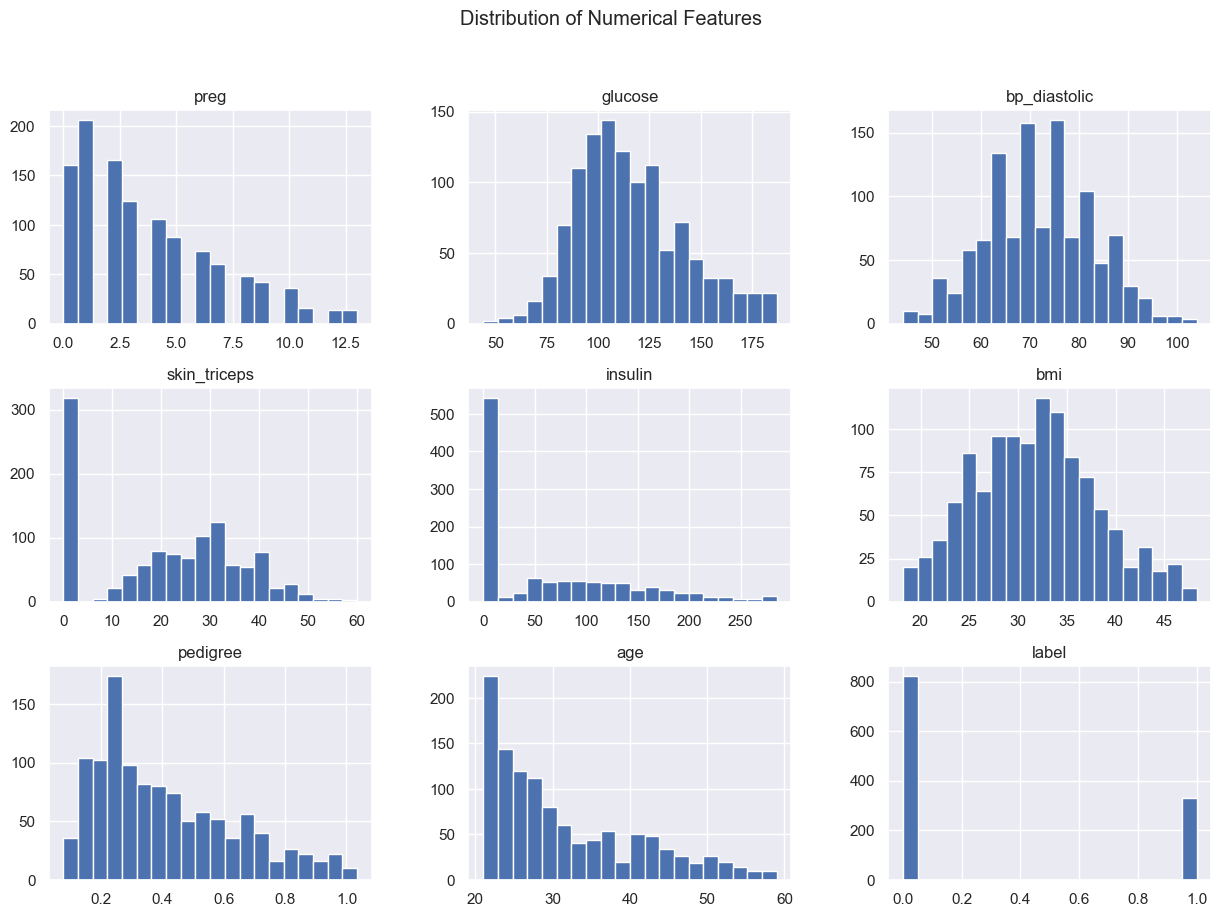

In [154]:
# Distribution of numerical features
df.hist(bins=20, figsize=(15, 10))
plt.suptitle('Distribution of Numerical Features')
plt.show()

# HeatMap

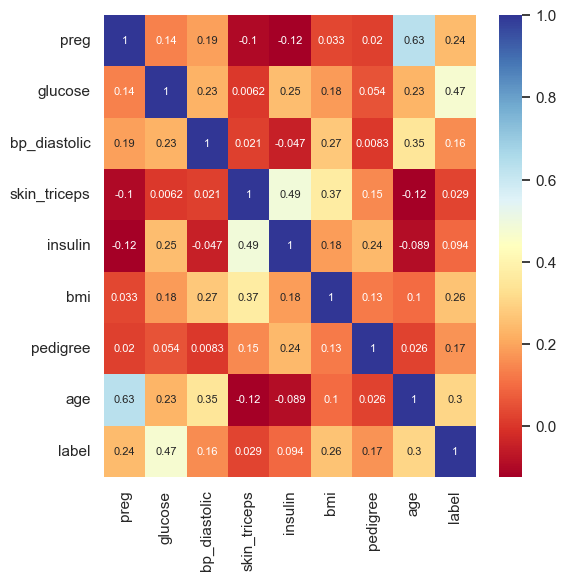

In [155]:
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(6,6))
#plot heat map
sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlBu", annot_kws={"fontsize": 8});

# Pair Plot

# Age vs Label Distribution

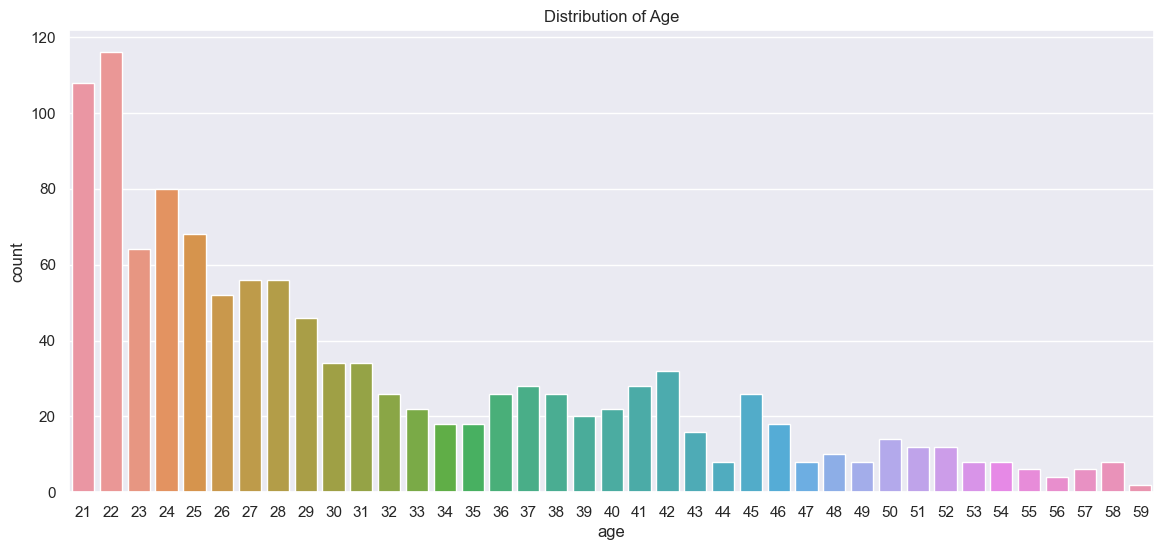

In [156]:
# Distribution of categorical features
sns.countplot(x='age', data=df)
plt.title('Distribution of Age')
plt.show()

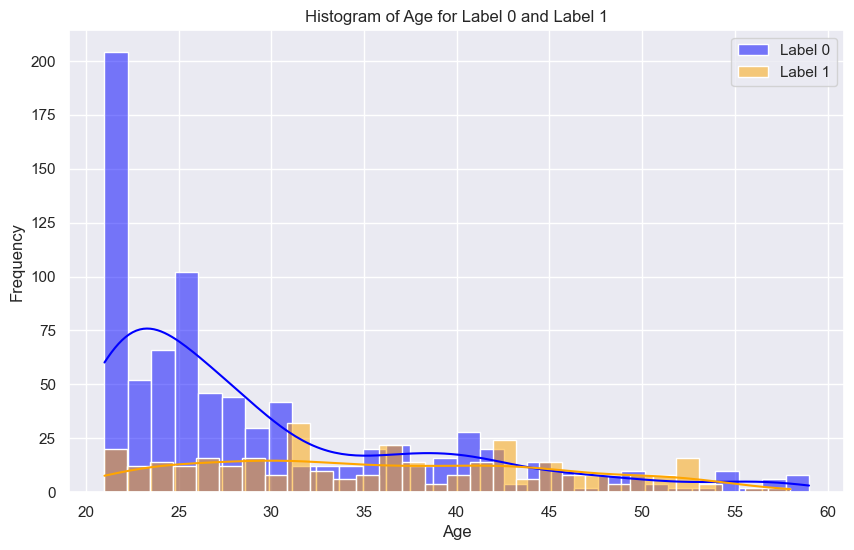

In [157]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create separate DataFrames for label 0 and label 1
label_0_data = df[df['label'] == 0]
label_1_data = df[df['label'] == 1]

# Plot histograms for age
plt.figure(figsize=(10, 6))
sns.histplot(label_0_data['age'], bins=30, kde=True, label='Label 0', color='blue')
sns.histplot(label_1_data['age'], bins=30, kde=True, label='Label 1', color='orange')

# Set plot labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age for Label 0 and Label 1')

# Show the legend
plt.legend()

# Show the plot
plt.show()


In [158]:
cols=list(df.columns)
cols

['preg',
 'glucose',
 'bp_diastolic',
 'skin_triceps',
 'insulin',
 'bmi',
 'pedigree',
 'age',
 'label']

In [159]:
feature_cols=['preg', 'glucose', 'bp_diastolic', 'skin_triceps', 'insulin', 'bmi', 'pedigree', 'age']
print(feature_cols)

['preg', 'glucose', 'bp_diastolic', 'skin_triceps', 'insulin', 'bmi', 'pedigree', 'age']


# Data Train-Test split

In [160]:
#Library Call for data split in two portion Train and Test: 
from sklearn.model_selection import train_test_split

In [161]:
#dataframe
x=df[feature_cols]  #feature
#series
y=df.label
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.2, random_state=30)

In [162]:
#Total size of the Training dataset:
print("[XY_Train] dataset Shape:", x_train.shape)

#Total size of the Testing dataset:
print("[XY_Test] dataset Shape:", x_test.shape)

[XY_Train] dataset Shape: (923, 8)
[XY_Test] dataset Shape: (231, 8)


In [163]:
#Checking the number of 0's in Training portion of the Dataset:
print("[Y_Train] Total number of [0] in dataset :", len(y_train[y_train==0]))

#Checking the number of 1's in Training portion of the Dataset:
print("[Y_Train] Total number of [1] in dataset :", len(y_train[y_train==1]))

[Y_Train] Total number of [0] in dataset : 651
[Y_Train] Total number of [1] in dataset : 272


In [164]:
#Checking the number of 0's in Testing portion of the Dataset:
print("[Y_Test] Total number of [0] in dataset :", len(y_test[y_test==0]))

#Checking the number of 1's in Testing portion of the Dataset:
print("[Y_Test] Total number of [1] in dataset :", len(y_test[y_test==1]))

[Y_Test] Total number of [0] in dataset : 171
[Y_Test] Total number of [1] in dataset : 60


# Training-Testing Value Counts:

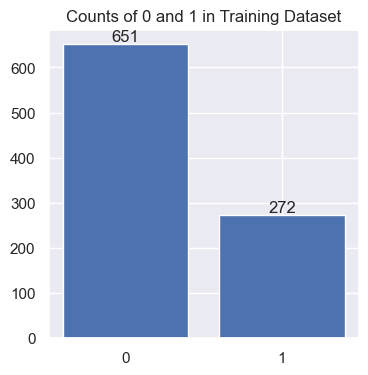

In [165]:
# get total number of 0 in the training dataset
Trcount0 = y_train[y_train==0].count()

# get total number of 1 in the training dataset
Trcount1 = y_train[y_train==1].count()

# Plotting the bar chart
label = ['0', '1']
counts = [Trcount0, Trcount1]

plt.figure(figsize=(4,4))
plt.title('Counts of 0 and 1 in Training Dataset')
plt.bar(label, counts)

# Add annotations to the bars
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
   
plt.show()

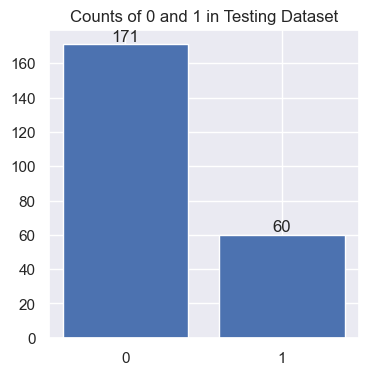

In [166]:
# get total number of 0 in the testing dataset
Trcount0 = y_test[y_test==0].count()

# get total number of 1 in the testing dataset
Trcount1 = y_test[y_test==1].count()

# Plotting the bar chart
label = ['0', '1']
counts = [Trcount0, Trcount1]

plt.figure(figsize=(4,4))
plt.title('Counts of 0 and 1 in Testing Dataset')
plt.bar(label, counts)

# Add annotations to the bars
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
   
plt.show()

# PART 01:

# KNeighbour Library call

In [167]:
from sklearn.neighbors import KNeighborsClassifier
clf_K= KNeighborsClassifier(n_neighbors=3)
# Train Classifer
model_K = clf_K.fit(x_train, y_train)
#Predict the response for test dataset
y_pred_K = clf_K.predict(x_test)
y=pd.DataFrame({"Origional": y_test, "Predicted_K": y_pred_K})
y.head()

,Origional,Predicted_K
575,0,0
0,1,1
572,0,0
1284,1,1
611,1,1


# Confusion Matrics of KNN

Confusion Matrix:
[[140  31]
 [ 26  34]]


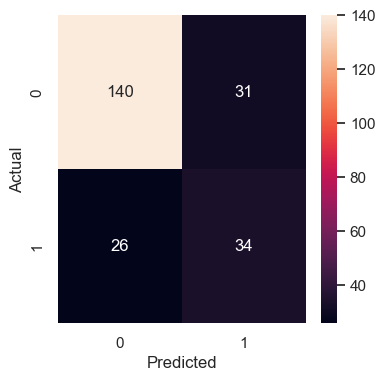

In [168]:
# calculate accuracy
from sklearn import metrics

result_K = metrics.confusion_matrix(y_test, y_pred_K)
print("Confusion Matrix:")
print(result_K)

def plt1():
    import seaborn as sns; sns.set()
    plt.figure(figsize=(4,4))
    c_mtrx_K = pd.crosstab(y_test, y_pred_K, rownames=['Actual'], colnames=['Predicted'])
    sns.heatmap(c_mtrx_K, annot=True, fmt = '.3g')

plt1()

# Accuracy Calculation of KNN

In [169]:
#[row, column]
#(Actual, Predict)
TP = result_K[1, 1]      
TN = result_K[0, 0]
FP = result_K[0, 1]
FN = result_K[1, 0]

def EvClsMdl(res):
    print('Metrics computed from a confusion matrix')
    print("Accuracy:\t", metrics.accuracy_score(y_test, y_pred_K))
    print("Sensitivity:\t", metrics.recall_score(y_test, y_pred_K))
    print("Specificity:\t",TN / (TN + FP))
    print("Precision:\t", metrics.precision_score(y_test, y_pred_K))
    print("Classification Eerror:", 1 - metrics.accuracy_score(y_test, y_pred_K))
    print("False_Positive_Rate:", 1 - TN / (TN + FP))
    print('###########################################')
EvClsMdl(result_K)

Metrics computed from a confusion matrix
Accuracy:	 0.7532467532467533
Sensitivity:	 0.5666666666666667
Specificity:	 0.8187134502923976
Precision:	 0.5230769230769231
Classification Eerror: 0.24675324675324672
False_Positive_Rate: 0.18128654970760238
###########################################


# PART 02:

# Naive Bayes Lib Call

In [170]:
from sklearn.naive_bayes import GaussianNB
clf_N = GaussianNB()
# Train Classifer
model_N = clf_N.fit(x_train, y_train)
y_pred_N = clf_N.predict(x_test)
y=pd.DataFrame({"Origional": y_test, "Predicted_N": y_pred_N})
y.head()

,Origional,Predicted_N
575,0,0
0,1,1
572,0,0
1284,1,1
611,1,1


In [193]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Assuming 'x' is your feature matrix and 'y' is your target variable
# Modify this according to your actual variable names
x = your_feature_matrix
y = your_target_variable

# Create a K-Nearest Neighbors classifier with k=3
clf_K = KNeighborsClassifier(n_neighbors=3)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(clf_K, x, y, cv=5, scoring='accuracy')  # You can choose a different scoring metric

# Print the cross-validated scores
print("Cross-validated Scores:", cv_scores)

# Print the mean and standard deviation of the scores
print(f"Mean Accuracy: {cv_scores.mean():.3f}")
print(f"Standard Deviation: {cv_scores.std():.3f}")

# Train the classifier on the training data
model_K = clf_K.fit(x_train, y_train)

# Predict the response for the test dataset
y_pred_K = clf_K.predict(x_test)
y = pd.DataFrame({"Original": y_test, "Predicted_K": y_pred_K})
y.head()


NameError: name 'your_feature_matrix' is not defined

# Confusion Matrics of Naive Bayes

Confusion Matrix:
[[143  28]
 [ 21  39]]


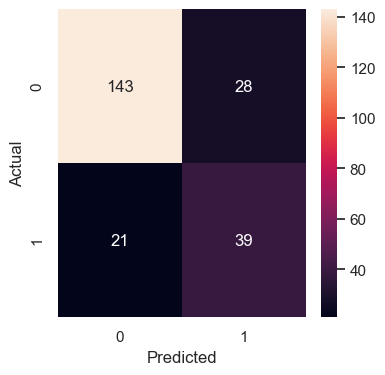

In [171]:
# calculate accuracy
from sklearn import metrics

result_N = metrics.confusion_matrix(y_test, y_pred_N)
print("Confusion Matrix:")
print(result_N)

def plt1():
    import seaborn as sns; sns.set()
    plt.figure(figsize=(4,4))
    c_mtrx_N = pd.crosstab(y_test, y_pred_N, rownames=['Actual'], colnames=['Predicted'])
    sns.heatmap(c_mtrx_N, annot=True, fmt = '.3g')

plt1()

# Accuracy Calculation of Naive Bayes

In [172]:
#[row, column]
#(Actual, Predict)
TP = result_N[1, 1]      
TN = result_N[0, 0]
FP = result_N[0, 1]
FN = result_N[1, 0]

def EvClsMdl(res):
    print('Metrics computed from a confusion matrix')
    print("Accuracy:\t", metrics.accuracy_score(y_test, y_pred_N))
    print("Sensitivity:\t", metrics.recall_score(y_test, y_pred_N))
    print("Specificity:\t",TN / (TN + FP))
    print("Precision:\t", metrics.precision_score(y_test, y_pred_N))
    print("Classification Eerror:", 1 - metrics.accuracy_score(y_test, y_pred_N))
    print("False_Positive_Rate:", 1 - TN / (TN + FP))
    print('###########################################')
EvClsMdl(result_N)

Metrics computed from a confusion matrix
Accuracy:	 0.7878787878787878
Sensitivity:	 0.65
Specificity:	 0.8362573099415205
Precision:	 0.582089552238806
Classification Eerror: 0.21212121212121215
False_Positive_Rate: 0.16374269005847952
###########################################


# PART 03:

# Decision Tree Lib Call

In [173]:
from sklearn.tree import DecisionTreeClassifier
# Create Decision Tree classifer object
dpth=4
clf_D = DecisionTreeClassifier(criterion="entropy", max_depth=dpth)
# Train Classifer
model_D = clf_D.fit(x_train, y_train)
y_pred_D = clf_D.predict(x_test)
y=pd.DataFrame({"Origional": y_test, "Predicted_D": y_pred_D})
y.head()

,Origional,Predicted_D
575,0,0
0,1,1
572,0,0
1284,1,1
611,1,1


# Confusion Matrics of Decision Tree

Confusion Matrix:
[[167   4]
 [ 40  20]]


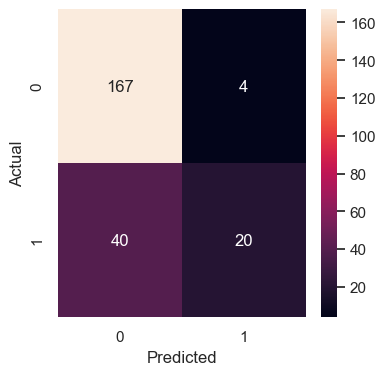

In [174]:
# calculate accuracy
from sklearn import metrics

result_D = metrics.confusion_matrix(y_test, y_pred_D)
print("Confusion Matrix:")
print(result_D)

def plt1():
    import seaborn as sns; sns.set()
    plt.figure(figsize=(4,4))
    c_mtrx_D = pd.crosstab(y_test, y_pred_D, rownames=['Actual'], colnames=['Predicted'])
    sns.heatmap(c_mtrx_D, annot=True, fmt = '.3g')

plt1()

# Accuracy Calculation of Decision Tree

In [175]:
#[row, column]
#(Actual, Predict)
TP = result_D[1, 1]      
TN = result_D[0, 0]
FP = result_D[0, 1]
FN = result_D[1, 0]

def EvClsMdl(res):
    print('Metrics computed from a confusion matrix')
    print("Accuracy:\t", metrics.accuracy_score(y_test, y_pred_D))
    print("Sensitivity:\t", metrics.recall_score(y_test, y_pred_D))
    print("Specificity:\t",TN / (TN + FP))
    print("Precision:\t", metrics.precision_score(y_test, y_pred_D))
    print("Classification Eerror:", 1 - metrics.accuracy_score(y_test, y_pred_D))
    print("False_Positive_Rate:", 1 - TN / (TN + FP))
    print('###########################################')
EvClsMdl(result_D)

Metrics computed from a confusion matrix
Accuracy:	 0.8095238095238095
Sensitivity:	 0.3333333333333333
Specificity:	 0.9766081871345029
Precision:	 0.8333333333333334
Classification Eerror: 0.19047619047619047
False_Positive_Rate: 0.023391812865497075
###########################################


# PART 04:

# Random Forest Lib Call

In [176]:
from sklearn.ensemble import RandomForestClassifier
clf_R=RandomForestClassifier(n_estimators=3)
# Train Classifer
model_R = clf_R.fit(x_train, y_train)
y_pred_R = clf_R.predict(x_test)
y=pd.DataFrame({"Origional": y_test, "Predicted_R": y_pred_R})
y.head()

,Origional,Predicted_R
575,0,0
0,1,1
572,0,0
1284,1,1
611,1,1


# Confusion Matrics of Random Forest

Confusion Matrix:
[[165   6]
 [ 12  48]]


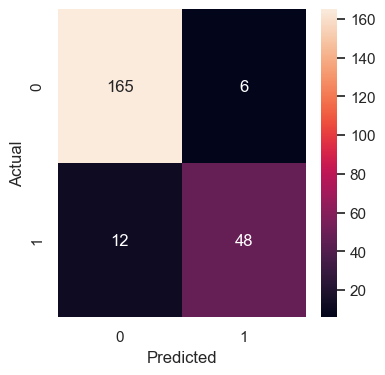

In [177]:
# calculate accuracy
from sklearn import metrics

result_R = metrics.confusion_matrix(y_test, y_pred_R)
print("Confusion Matrix:")
print(result_R)

def plt1():
    import seaborn as sns; sns.set()
    plt.figure(figsize=(4,4))
    c_mtrx_R = pd.crosstab(y_test, y_pred_R, rownames=['Actual'], colnames=['Predicted'])
    sns.heatmap(c_mtrx_R, annot=True, fmt = '.3g')

plt1()

# Accuracy Calculation of Random Forest

In [178]:
#[row, column]
#(Actual, Predict)
TP = result_R[1, 1]      
TN = result_R[0, 0]
FP = result_R[0, 1]
FN = result_R[1, 0]

def EvClsMdl(res):
    print('Metrics computed from a confusion matrix')
    print("Accuracy:\t", metrics.accuracy_score(y_test, y_pred_R))
    print("Sensitivity:\t", metrics.recall_score(y_test, y_pred_R))
    print("Specificity:\t",TN / (TN + FP))
    print("Precision:\t", metrics.precision_score(y_test, y_pred_R))
    print("Classification Eerror:", 1 - metrics.accuracy_score(y_test, y_pred_R))
    print("False_Positive_Rate:", 1 - TN / (TN + FP))
    print('###########################################')
EvClsMdl(result_R)

Metrics computed from a confusion matrix
Accuracy:	 0.922077922077922
Sensitivity:	 0.8
Specificity:	 0.9649122807017544
Precision:	 0.8888888888888888
Classification Eerror: 0.07792207792207795
False_Positive_Rate: 0.03508771929824561
###########################################


# Model Evalution

In [179]:
import pandas as pd
from prettytable import PrettyTable
from sklearn import metrics

# Assuming you have stored predicted labels in y_pred_K, y_pred_N, y_pred_D, and y_pred_R

# Create a list of model names
model_names = ['KNN', 'Naive Bayes', 'Decision Tree', 'Random Forest']

# Initialize PrettyTable
table = PrettyTable()
table.field_names = ["Model", "Accuracy", "Sensitivity", "Specificity", "Precision", "Classification Error", "False Positive Rate"]

# Function to add rows to the table
def add_row(model_name, y_pred):
    accuracy = metrics.accuracy_score(y_test, y_pred)
    sensitivity = metrics.recall_score(y_test, y_pred)
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
    specificity = confusion_matrix[0, 0] / (confusion_matrix[0, 0] + confusion_matrix[0, 1])
    precision = metrics.precision_score(y_test, y_pred)
    classification_error = 1 - accuracy
    false_positive_rate = 1 - specificity
    
    table.add_row([model_name, round(accuracy, 3), round(sensitivity, 3), round(specificity, 3),
                   round(precision, 3), round(classification_error, 3), round(false_positive_rate, 3)])

# Add rows for each model
add_row("KNN", y_pred_K)
add_row("Naive Bayes", y_pred_N)
add_row("Decision Tree", y_pred_D)
add_row("Random Forest", y_pred_R)

# Print the table
table



Model,Accuracy,Sensitivity,Specificity,Precision,Classification Error,False Positive Rate
KNN,0.753,0.567,0.819,0.523,0.247,0.181
Naive Bayes,0.788,0.65,0.836,0.582,0.212,0.164
Decision Tree,0.81,0.333,0.977,0.833,0.19,0.023
Random Forest,0.922,0.8,0.965,0.889,0.078,0.035


# Confusion Matrixs:

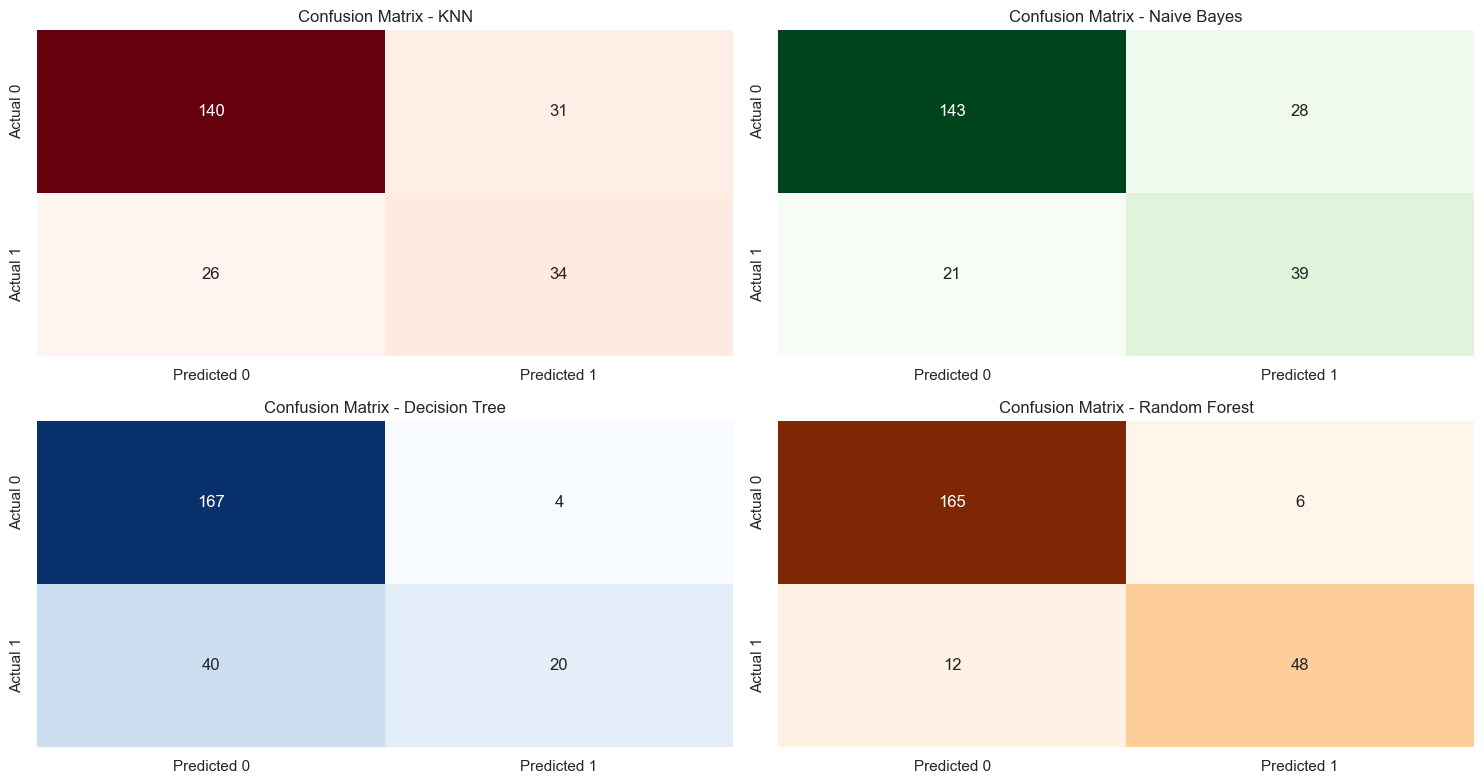

In [180]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import metrics

# Assuming you have stored confusion matrices in result_K, result_N, result_D, and result_R

# Create DataFrames for confusion matrices
confusion_df_K = pd.DataFrame(result_K, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
confusion_df_N = pd.DataFrame(result_N, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
confusion_df_D = pd.DataFrame(result_D, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
confusion_df_R = pd.DataFrame(result_R, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

# Plot confusion matrices
plt.figure(figsize=(15, 8))

plt.subplot(2, 2, 1)
sns.heatmap(confusion_df_K, annot=True, fmt='.0f', cmap='Reds', cbar=False)
plt.title('Confusion Matrix - KNN')

plt.subplot(2, 2, 2)
sns.heatmap(confusion_df_N, annot=True, fmt='.0f', cmap='Greens', cbar=False)
plt.title('Confusion Matrix - Naive Bayes')

plt.subplot(2, 2, 3)
sns.heatmap(confusion_df_D, annot=True, fmt='.0f', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Decision Tree')

plt.subplot(2, 2, 4)
sns.heatmap(confusion_df_R, annot=True, fmt='.0f', cmap='Oranges', cbar=False)
plt.title('Confusion Matrix - Random Forest')

plt.tight_layout()
plt.show()



# Accuracies:

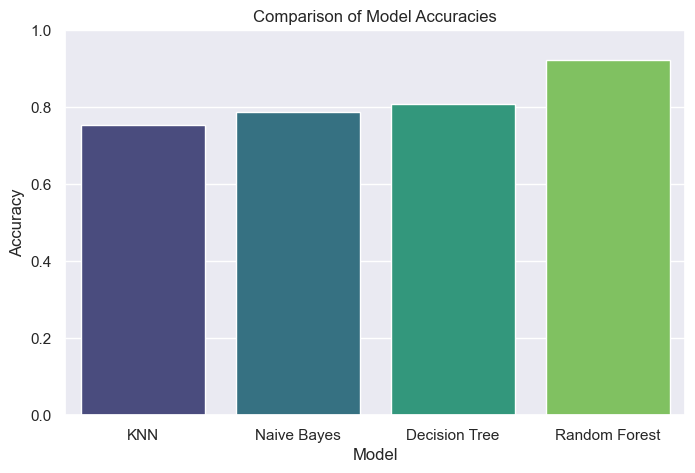

In [181]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming you have stored accuracy scores in a list
accuracies = [
    metrics.accuracy_score(y_test, y_pred_K),
    metrics.accuracy_score(y_test, y_pred_N),
    metrics.accuracy_score(y_test, y_pred_D),
    metrics.accuracy_score(y_test, y_pred_R)
]

# Create a DataFrame for better visualization
model_names = ['KNN', 'Naive Bayes', 'Decision Tree', 'Random Forest']
accuracy_df = pd.DataFrame({'Model': model_names, 'Accuracy': accuracies})

# Plot the accuracies
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Accuracy', data=accuracy_df, palette='viridis')
plt.title('Comparison of Model Accuracies')
plt.ylim(0, 1)  # Set the y-axis limit to ensure proper scale
plt.show()


# Precision

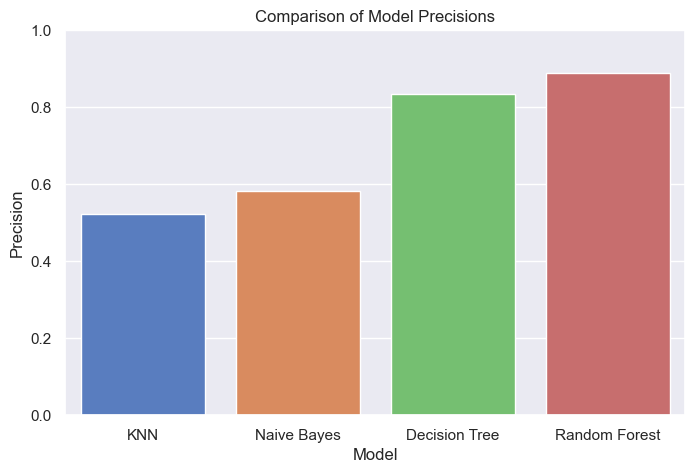

In [182]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming you have stored precision scores in a list
precisions = [
    metrics.precision_score(y_test, y_pred_K),
    metrics.precision_score(y_test, y_pred_N),
    metrics.precision_score(y_test, y_pred_D),
    metrics.precision_score(y_test, y_pred_R)
]

# Create a DataFrame for better visualization
model_names = ['KNN', 'Naive Bayes', 'Decision Tree', 'Random Forest']
precision_df = pd.DataFrame({'Model': model_names, 'Precision': precisions})

# Plot the precision scores
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Precision', data=precision_df, palette='muted')
plt.title('Comparison of Model Precisions')
plt.ylim(0, 1)  # Set the y-axis limit to ensure proper scale
plt.show()



# Sensetivity(Recall):

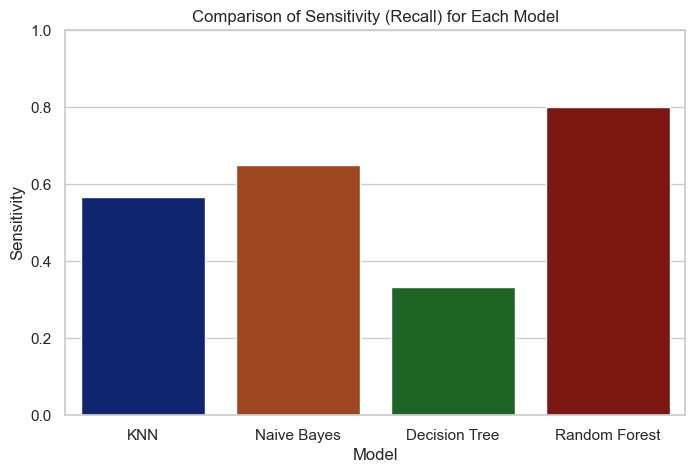

In [191]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import metrics

# Assuming you have stored sensitivity scores in a list
sensitivities = [
    metrics.recall_score(y_test, y_pred_K),
    metrics.recall_score(y_test, y_pred_N),
    metrics.recall_score(y_test, y_pred_D),
    metrics.recall_score(y_test, y_pred_R)
]

# Create a DataFrame for better visualization
model_names = ['KNN', 'Naive Bayes', 'Decision Tree', 'Random Forest']
sensitivity_df = pd.DataFrame({'Model': model_names, 'Sensitivity': sensitivities})

# Set a dark color palette
sns.set_palette('dark')

# Plot the sensitivity scores
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Sensitivity', data=sensitivity_df)
plt.title('Comparison of Sensitivity (Recall) for Each Model')
plt.ylim(0, 1)  # Set the y-axis limit to ensure proper scale
plt.show()

# F1-Measure

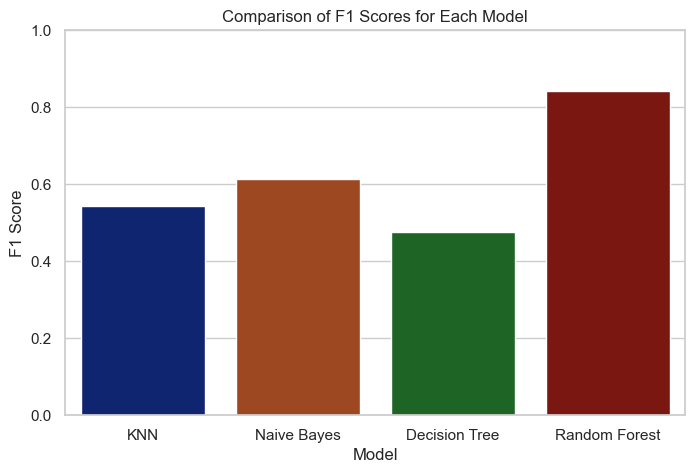

In [190]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import metrics

# Assuming you have stored F1 scores in a list
f1_scores = [
    metrics.f1_score(y_test, y_pred_K),
    metrics.f1_score(y_test, y_pred_N),
    metrics.f1_score(y_test, y_pred_D),
    metrics.f1_score(y_test, y_pred_R)
]

# Create a DataFrame for better visualization
model_names = ['KNN', 'Naive Bayes', 'Decision Tree', 'Random Forest']
f1_df = pd.DataFrame({'Model': model_names, 'F1 Score': f1_scores})

# Set a dark color palette
sns.set_palette('dark')

# Plot the F1 scores
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='F1 Score', data=f1_df)
plt.title('Comparison of F1 Scores for Each Model')
plt.ylim(0, 1)  # Set the y-axis limit to ensure proper scale
plt.show()


# Support:

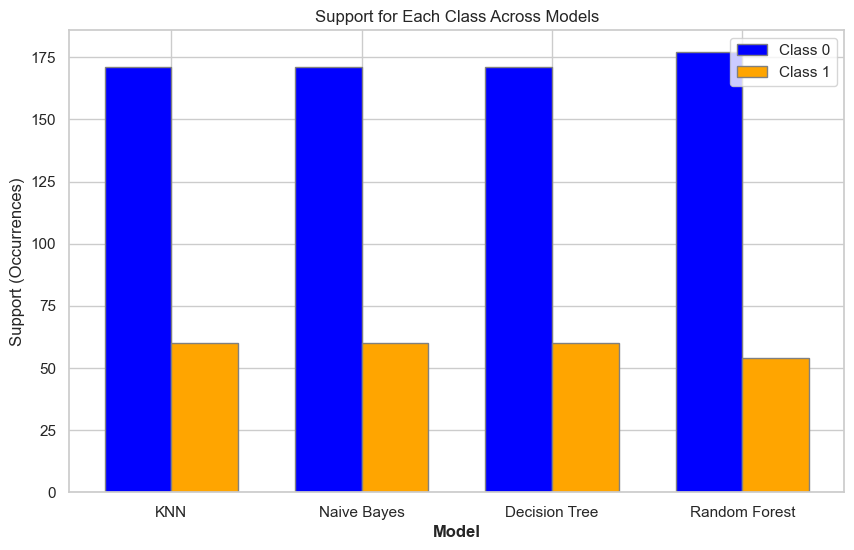

In [189]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have support values for each class from your models
support_0 = [result_K[0, :].sum(), result_N[0, :].sum(), result_D[0, :].sum(), result_R[:, 0].sum()]
support_1 = [result_K[1, :].sum(), result_N[1, :].sum(), result_D[1, :].sum(), result_R[:, 1].sum()]

# Create a DataFrame for better visualization
model_names = ['KNN', 'Naive Bayes', 'Decision Tree', 'Random Forest']
support_df = pd.DataFrame({'Model': model_names, 'Class 0 Support': support_0, 'Class 1 Support': support_1})

# Plot the grouped bar chart
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
barWidth = 0.35

# Set position of bar on X axis
r1 = range(len(model_names))
r2 = [x + barWidth for x in r1]

# Plot bars
plt.bar(r1, support_df['Class 0 Support'], color='blue', width=barWidth, edgecolor='grey', label='Class 0')
plt.bar(r2, support_df['Class 1 Support'], color='orange', width=barWidth, edgecolor='grey', label='Class 1')

# Add labels and title
plt.xlabel('Model', fontweight='bold')
plt.xticks([r + barWidth / 2 for r in range(len(model_names))], model_names)
plt.ylabel('Support (Occurrences)')
plt.title('Support for Each Class Across Models')
plt.legend()

# Show the plot
plt.show()
